## Sentiment Anlaysis - Movie Review

#### Mengheng Xue
#### 04/15/2019

### import libraraies

In [14]:
from sklearn.datasets import load_files
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### import data
+ reviews dataset consists of totally 2000 reviews 

In [2]:
path_data = './review_polarity/txt_sentoken'
reviews = load_files(os.path.join(path_data))
len(reviews.data)

2000

#### test review example

In [3]:
reviews.data[1]

b"good films are hard to find these days . \ngreat films are beyond rare . \nproof of life , russell crowe's one-two punch of a deft kidnap and rescue thriller , is one of those rare gems . \na taut drama laced with strong and subtle acting , an intelligent script , and masterful directing , together it delivers something virtually unheard of in the film industry these days , genuine motivation in a story that rings true . \nconsider the strange coincidence of russell crowe's character in proof of life making the moves on a distraught wife played by meg ryan's character in the film -- all while the real russell crowe was hitching up with married woman meg ryan in the outside world . \ni haven't seen this much chemistry between actors since mcqueen and mcgraw teamed up in peckinpah's masterpiece , the getaway . \nbut enough with the gossip , let's get to the review . \nthe film revolves around the kidnapping of peter bowman ( david morse ) , an american engineer working in south america

In [4]:
reviews.target[1]

1

#### test balance of dataset

In [5]:
len(reviews.target[reviews.target == 0]) / len(reviews.target[reviews.target == 1])

1.0

### splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    reviews.data, reviews.target, test_size=0.2, train_size=0.8, random_state=1)
print('length of X traning dataset: {x}'.format(x=len(X_train)))
print('length of y traning dataset: {x}'.format(x=len(y_train)))
print('length of X test dataset: {x}'.format(x=len(X_test)))
print('length of y test dataset: {x}'.format(x=len(y_test)))

length of X traning dataset: 1600
length of y traning dataset: 1600
length of X test dataset: 400
length of y test dataset: 400


### create bag of words model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
X_train_sparse = cv.fit_transform(X_train).toarray()
X_test_sparse = cv.transform(X_test).toarray()
print('size of X_train_sparse: {x}'.format(x=X_train_sparse.shape))
print('size of X_test_sparse: {x}'.format(x=X_test_sparse.shape))

size of X_train_sparse: (1600, 457579)
size of X_test_sparse: (400, 457579)


### Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
logit = LogisticRegression(random_state=1,n_jobs=-1, solver='lbfgs')
logit.fit(X_train_sparse, y_train)
print("Accuracy: {}".format(round(accuracy_score(y_test, logit.predict(X_test_sparse)), 3)))
print("AUC: {}".format(round(roc_auc_score(y_test, logit.predict(X_test_sparse)), 3)))

Accuracy: 0.865
AUC: 0.866


### Naive Bayes 

In [9]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_sparse, y_train)
print("Accuracy: {}".format(round(accuracy_score(y_test, nb.predict(X_test_sparse)), 3)))
print("AUC: {}".format(round(roc_auc_score(y_test, nb.predict(X_test_sparse)), 3)))

Accuracy: 0.772
AUC: 0.77


### SVM

In [11]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=1)
svm.fit(X_train_sparse, y_train)
print("Accuracy: {}".format(round(accuracy_score(y_test, svm.predict(X_test_sparse)), 3)))
print("AUC: {}".format(round(roc_auc_score(y_test, svm.predict(X_test_sparse)), 3)))

C:\Users\mengh\Anaconda3\envs\python35\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.86
AUC: 0.861


### Visualization

In [12]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right")

def plot_grid_scores(grid, param_name):
    plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    legend()

#### word importance

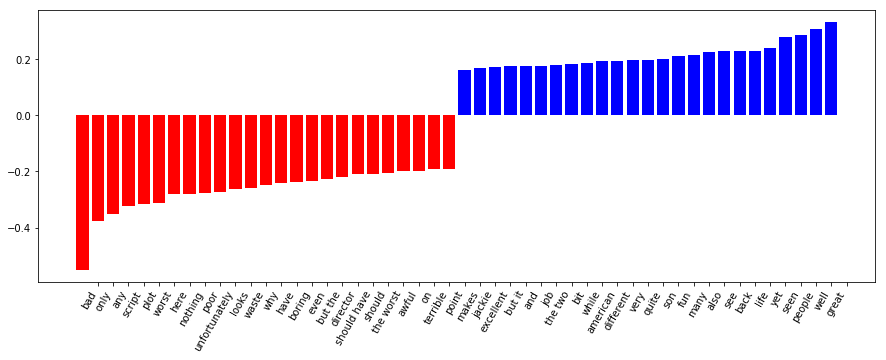

In [15]:
# LR
visualize_coefficients(logit, cv.get_feature_names())

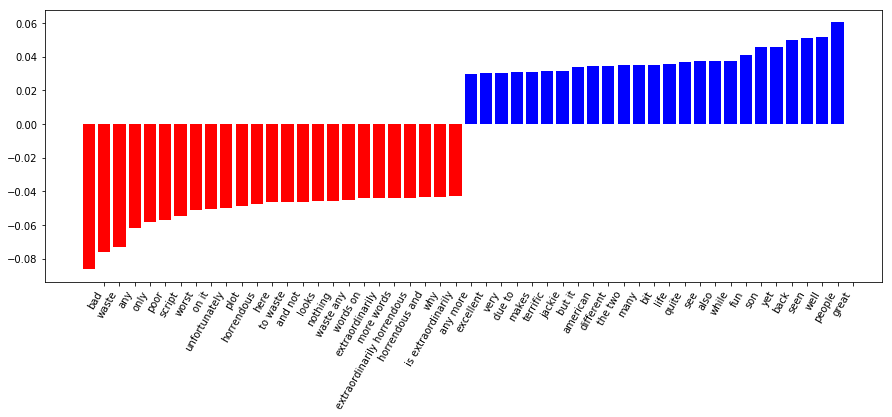

In [17]:
# SVM
visualize_coefficients(svm, cv.get_feature_names())

### Summary
Based on our experiments, we find that logistic regression achieves the best accuracy performance at 0.86, which is very promising since we only choose the simple parameter setting and haven't done regularzation. We can continue to improve the model accuracy by regularization. Also, our dataset only contains 2000 reviews. We believe we can improve our model performance if we can extend our dataset. 